In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [50]:
df_heart=pd.read_csv('/Users/karimsalah/Documents/Diploma/ML/Project2/heart.csv')
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [51]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [52]:
y=df_heart['HeartDisease']
X=df_heart.drop('HeartDisease',axis=1) #axis=1 to drop column 


In [53]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
X['Sex']=label_encoder.fit_transform(X['Sex'])  # Male=1, Female=0

In [54]:
X['ExerciseAngina'] = label_encoder.fit_transform(X['ExerciseAngina']) # Y=1, N=0

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 79.0+ KB


In [56]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up


In [57]:
from sklearn.preprocessing import OneHotEncoder

# Create separate encoders for each feature
encoder_chestPain = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  
encoder_restingECG = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  
encoder_stSlope = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 

# Fit and transform only on training data (assuming X is your training data)
encoded_ChestPainType = encoder_chestPain.fit_transform(X[['ChestPainType']])
encoded_RestingECG = encoder_restingECG.fit_transform(X[['RestingECG']])
encoded_ST_Slope = encoder_stSlope.fit_transform(X[['ST_Slope']])

# Create DataFrames with correct column names
encoded_ChestPainType_df = pd.DataFrame(encoded_ChestPainType, columns=encoder_chestPain.get_feature_names_out(['ChestPainType']))
encoded_RestingECG_df = pd.DataFrame(encoded_RestingECG, columns=encoder_restingECG.get_feature_names_out(['RestingECG']))
encoded_ST_Slope_df = pd.DataFrame(encoded_ST_Slope, columns=encoder_stSlope.get_feature_names_out(['ST_Slope']))

# Concatenate 
X_encoded = pd.concat([
    X.drop(['ChestPainType', 'RestingECG', 'ST_Slope'], axis=1),
    encoded_ChestPainType_df,
    encoded_RestingECG_df,
    encoded_ST_Slope_df
], axis=1)

# Transform validation/test data using the fitted encoders
# ... (similar code for X_val or X_test)

In [58]:
X_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,160,180,0,156,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1,130,283,0,98,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48,0,138,214,0,108,1,1.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,54,1,150,195,0,122,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [59]:
X_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int64  
 7   Oldpeak            918 non-null    float64
 8   ChestPainType_ASY  918 non-null    float64
 9   ChestPainType_ATA  918 non-null    float64
 10  ChestPainType_NAP  918 non-null    float64
 11  ChestPainType_TA   918 non-null    float64
 12  RestingECG_LVH     918 non-null    float64
 13  RestingECG_Normal  918 non-null    float64
 14  RestingECG_ST      918 non-null    float64
 15  ST_Slope_Down      918 non-null    float64
 16  ST_Slope_Flat      918 non

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


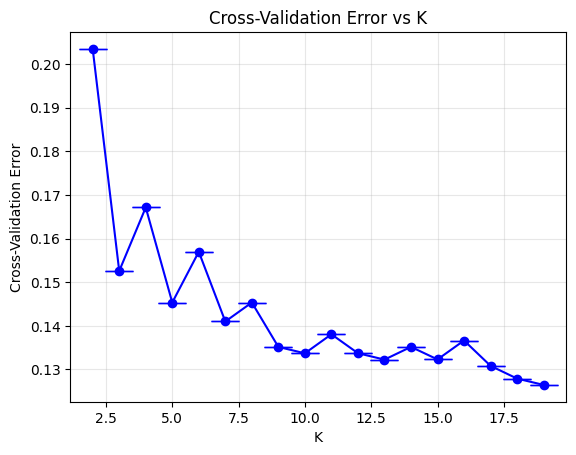

Optimal K: 19
Test Error: 0.1826
[np.float64(0.20344864064318213), np.float64(0.15256532317782714), np.float64(0.16712154871469362), np.float64(0.14534010367079234), np.float64(0.15696604252618207), np.float64(0.14099227758383592), np.float64(0.14534010367079234), np.float64(0.1351634401777213), np.float64(0.13370358616312283), np.float64(0.13806199090235904), np.float64(0.13372474346768226), np.float64(0.13225431080080394), np.float64(0.13517401883000116), np.float64(0.1322966254099228), np.float64(0.13663387284459957), np.float64(0.13082619274304452), np.float64(0.12790648471384736), np.float64(0.1264572093515286)]


In [83]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler() 

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, y, test_size=0.25, random_state=0)

sc1=StandardScaler()

sc1.fit(X_train2)
X_train_scaled2=sc1.transform(X_train2)
X_test_scaled2=sc1.transform(X_test2)

# Parameters
k_values = np.arange(2, 20)  # Values of K to test
cv_repeats = 10          # Number of repetitions for CV
errors_mean = []
errors_std = []

# Perform CV for each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    errors = []
    
    for _ in range(cv_repeats):
        scores = cross_val_score(knn, X_train_scaled2, y_train2, cv=5, scoring='accuracy')  # 5-fold CV
        errors.append(1 - np.mean(scores))  # Store error rate

    errors_mean.append(np.mean(errors))  # Mean error
    errors_std.append(np.std(errors))    # Std deviation for confidence interval

# Find optimal K
optimal_k = k_values[np.argmin(errors_mean)]

# Train final model and calculate test error
final_model = KNeighborsClassifier(n_neighbors=optimal_k)
final_model.fit(X_train_scaled2, y_train2)
test_error = 1 - final_model.score(X_test_scaled2, y_test2)

# Plotting
plt.errorbar(k_values, errors_mean, yerr=errors_std, fmt='-o', color='blue', ecolor='blue',elinewidth=3, capsize=10)
plt.xlabel('K')
plt.ylabel('Cross-Validation Error')
plt.title('Cross-Validation Error vs K')
plt.grid(alpha=0.3)


plt.show()
print(f"Optimal K: {optimal_k}")
print(f"Test Error: {test_error:.4f}")
print(errors_mean)

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
K_for = 19
knn_1 = KNeighborsClassifier(n_neighbors=K_for)
knn_1.fit(X_train_scaled2, y_train2)
y_pred_1 = knn_1.predict(X_test_scaled2)
accuracy = accuracy_score(y_test2,y_pred_1)
conf_matrix = confusion_matrix(y_test2, y_pred_1)
report = classification_report(y_test2, y_pred_1)


In [94]:
accuracy

0.8173913043478261

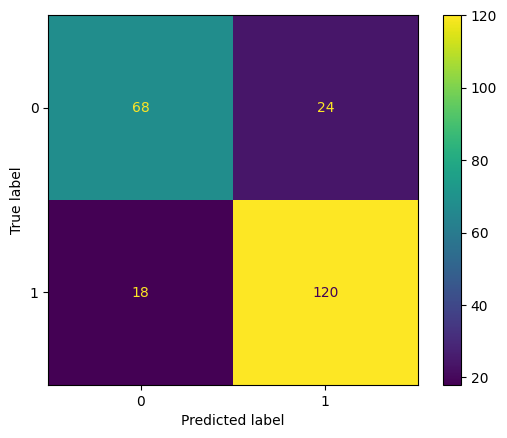

In [95]:

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()


In [96]:
print(report)

              precision    recall  f1-score   support

           0       0.79      0.74      0.76        92
           1       0.83      0.87      0.85       138

    accuracy                           0.82       230
   macro avg       0.81      0.80      0.81       230
weighted avg       0.82      0.82      0.82       230



In [101]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled2,y_train2)
y_pred_R = log_model.predict(X_test_scaled2)
accuracy_score(y_test2,y_pred_R)

0.8260869565217391

In [104]:
cm_R = confusion_matrix(y_test2,y_pred_R)

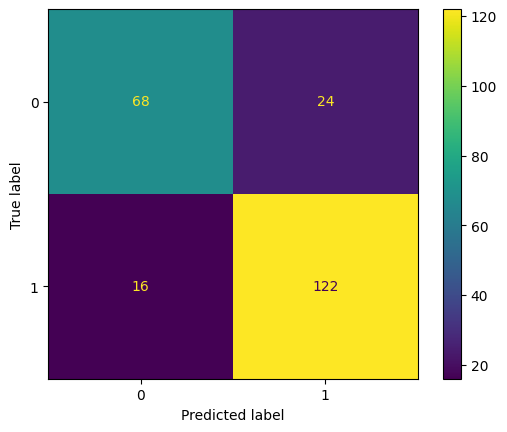

In [106]:
disp2= ConfusionMatrixDisplay(cm_R)
disp2.plot()

In [108]:
accuracy1 = accuracy_score(y_test2,y_pred_R)
accuracy1

0.8260869565217391

In [109]:
report1 = classification_report(y_test2, y_pred_R)
print(report1)

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        92
           1       0.84      0.88      0.86       138

    accuracy                           0.83       230
   macro avg       0.82      0.81      0.82       230
weighted avg       0.83      0.83      0.82       230



In [110]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dt_classifier.fit(X_train_scaled2, y_train2)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [111]:
y_pred_tree= dt_classifier.predict(X_test_scaled2)

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        92
           1       0.84      0.84      0.84       138

    accuracy                           0.81       230
   macro avg       0.80      0.80      0.80       230
weighted avg       0.81      0.81      0.81       230



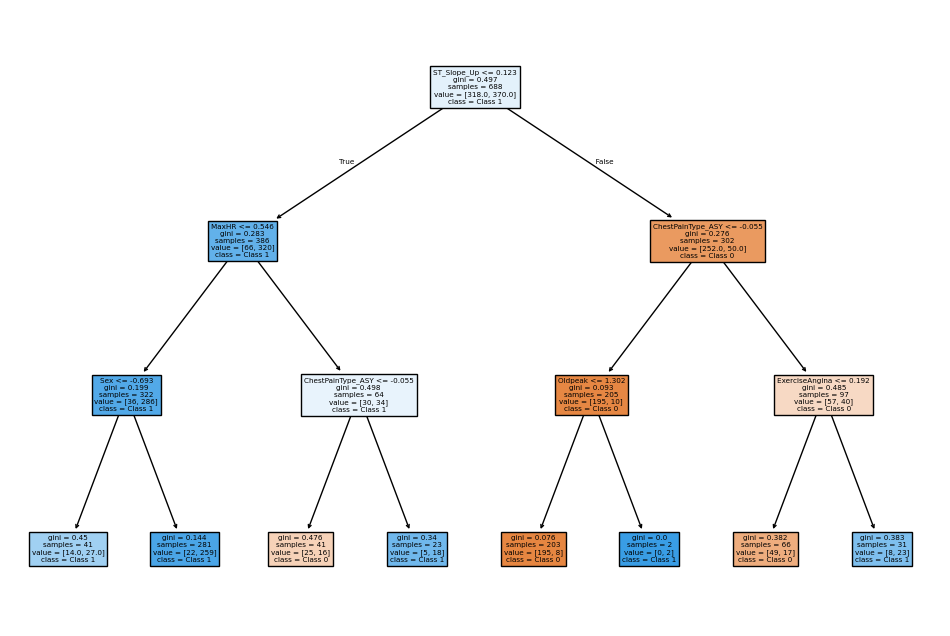

In [122]:


from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test2, y_pred_tree)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test2, y_pred_tree))

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))

# Replace `feature_names` and `target_names` with appropriate lists
plot_tree(
    dt_classifier,
    feature_names=X_encoded.columns[0:],  # Assuming last column is the target
    class_names=["Class 0", "Class 1"],  # Replace with actual class names if available
    filled=True
)
plt.show()


Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74        92
           1       0.82      0.83      0.83       138

    accuracy                           0.79       230
   macro avg       0.78      0.78      0.78       230
weighted avg       0.79      0.79      0.79       230



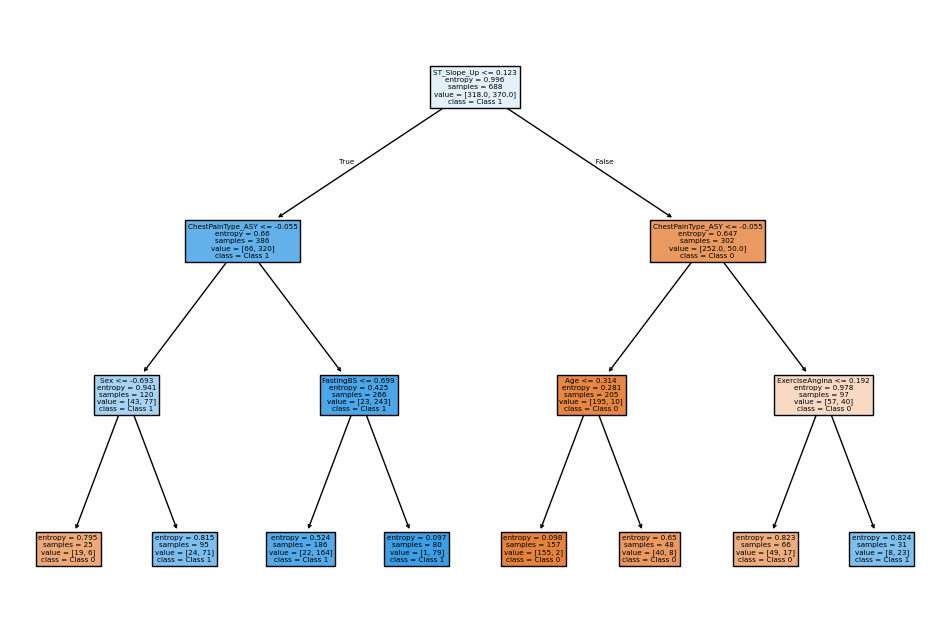

In [123]:
dt_classifier2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dt_classifier2.fit(X_train_scaled2, y_train2)
y_pred_tree2= dt_classifier2.predict(X_test_scaled2)
accuracy3 = accuracy_score(y_test2, y_pred_tree2)
print(f"Accuracy: {accuracy3:.2f}")
print("Classification Report:")
print(classification_report(y_test2, y_pred_tree2))

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))

# Replace `feature_names` and `target_names` with appropriate lists
plot_tree(
    dt_classifier2,
    feature_names=X_encoded.columns[0:],  # Assuming last column is the target
    class_names=["Class 0", "Class 1"],  # Replace with actual class names if available
    filled=True
)
plt.show()

In [ ]:
#as shown i think logistic regression is the best model as it shows better accuarcy and precision 